In [1]:
import os

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
base_dir = "/Users/szhan/Projects/tsimpute/analysis/genealogy_only/"

In [3]:
sampling_time = "1e4"

In [4]:
in_prefix = "t" + str(sampling_time) + "_" + "p80"
in_dir = base_dir + in_prefix + "/"

results = None
for i in np.arange(1, 101):
    in_file = in_dir + "sim" + "_" + str(i) + ".csv"
    if os.path.exists(in_file):
        df = pd.read_csv(in_file, skiprows=16)
        results = df if results is None else pd.concat([results, df])
    else:
        print(f"Not found {in_file}")

Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_32.csv
Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_47.csv
Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_69.csv
Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_78.csv
Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_79.csv
Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_89.csv
Not found /Users/szhan/Projects/tsimpute/analysis/genealogy_only/t1e4_p80/sim_91.csv


In [5]:
results

,position,maf,total_concordance,iqs
0,103.0,0.0002,1.000,NaN
1,208.0,0.0004,1.000,NaN
2,606.0,0.0009,1.000,NaN
3,747.0,0.3855,0.687,-0.145983
4,845.0,0.0007,1.000,NaN
...,...,...,...,...
2880,997408.0,0.0300,1.000,NaN
2881,997521.0,0.0040,1.000,NaN
2882,999014.0,0.0002,1.000,NaN
2883,999489.0,0.0182,1.000,NaN


In [20]:
df[["maf", "total_concordance"]].dropna(axis=0)

,maf,total_concordance
0,0.0003,1.0
1,0.0968,1.0
2,0.0004,1.0
3,0.0062,1.0
4,0.0009,1.0
...,...,...
2880,0.0300,1.0
2881,0.0040,1.0
2882,0.0002,1.0
2883,0.0182,1.0


In [27]:
tmp = df[["maf", "total_concordance"]].dropna(axis=0)
values = np.vstack([tmp["maf"], tmp["total_concordance"]])
kernel = stats.gaussian_kde(values)

In [35]:
x = kernel(np.vstack([results["maf"], results["total_concordance"]]))

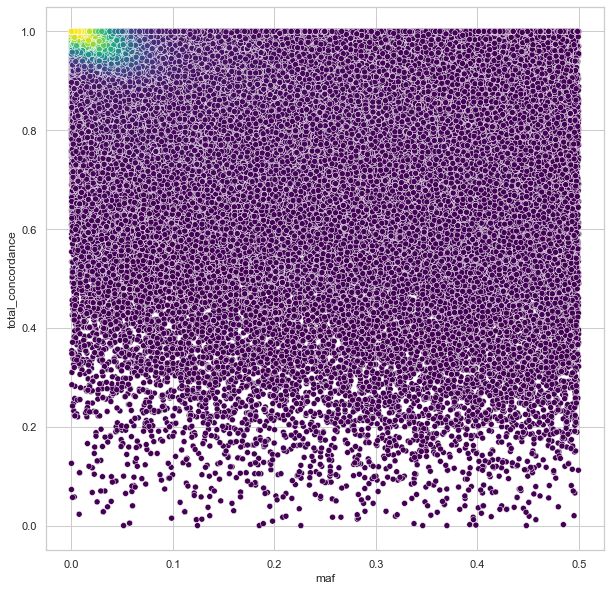

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(
    y="total_concordance",
    x="maf",
    data=results,
    c=x,
    cmap="viridis",
    ax=ax,
);

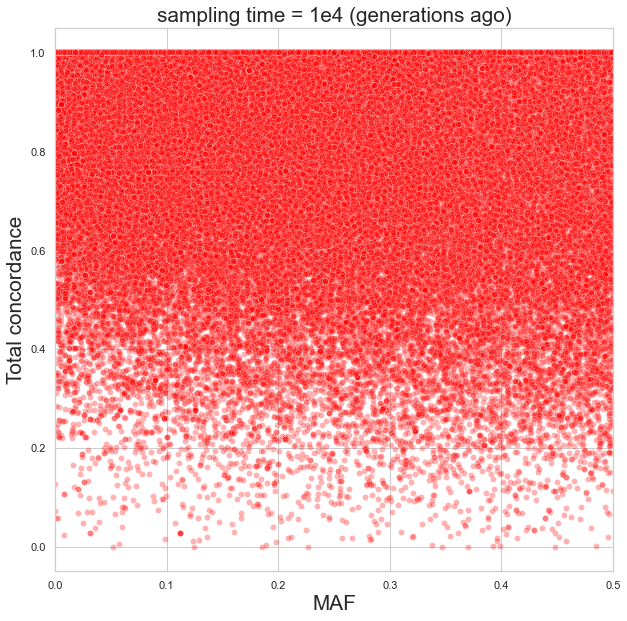

In [174]:
f, ax = plt.subplots(figsize=(10, 10))

ax.set_title(
    f"sampling time = {sampling_time} (generations ago)",
    size="xx-large"
)
#ax.set_ylabel("IQS", size="xx-large")
ax.set_ylabel("Total concordance", size="xx-large")
ax.set_xlabel("MAF", size="xx-large")
ax.set_xlim([0, 0.50])

g = sns.scatterplot(
    #y="iqs",
    y="total_concordance",
    x="maf",
    data=results,
    color="red",
    alpha=0.30,
    x_jitter=True
);

In [175]:
#out_file = in_prefix + ".iqs.png"
out_file = in_prefix + ".total_concordance.png"
g.get_figure().savefig(out_file)